In [315]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [316]:
warnings.filterwarnings('ignore')

# Get  DATA

In [317]:
df=pd.read_csv

In [318]:
column_names=["user_id","item_id","rating","timestamp"]
df=pd.read_csv("ml-100k/u.data",sep='\t',names=column_names)

In [319]:
df

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [320]:
df.shape

(100000, 4)

In [321]:
df['user_id'].nunique()

943

In [322]:
movie_titles=pd.read_csv("ml-100k/u.item",sep='|',header=None)

In [323]:
movie_titles.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

In [324]:
movie_titles=movie_titles[[0,1]]

In [325]:
movie_titles.columns=['item_id','title']

In [326]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [327]:
df=df.merge(movie_titles,how='inner',on='item_id')

# Exploratory analysis data

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [330]:
df.groupby(by="title").mean()['rating'].sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de d�cembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [331]:
df.groupby('title').count()['user_id']

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
� k�ldum klaka (Cold Fever) (1994)         1
Name: user_id, Length: 1664, dtype: int64

In [332]:

ratings=pd.merge(df.groupby('title').count()['user_id'],df.groupby(by="title").mean()['rating'].sort_values(ascending=False),on='title')

In [333]:
ratings.head()

,user_id,rating
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390


In [334]:
ratings.columns=["No of ratings","rating"]

In [335]:
ratings

,No of ratings,rating
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390
...,...,...
Young Guns II (1990),44,2.772727
"Young Poisoner's Handbook, The (1995)",41,3.341463
Zeus and Roxanne (1997),6,2.166667


In [336]:
ratings=ratings.sort_values(by='rating',ascending=False)

In [337]:
ratings

,No of ratings,rating
title,,
They Made Me a Criminal (1939),1,5.0
Marlene Dietrich: Shadow and Light (1996),1,5.0
"Saint of Fort Washington, The (1993)",2,5.0
Someone Else's America (1995),1,5.0
Star Kid (1997),3,5.0
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1,1.0
King of New York (1990),1,1.0
Touki Bouki (Journey of the Hyena) (1973),1,1.0


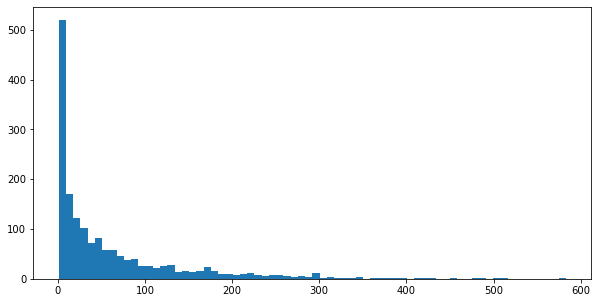

In [338]:
plt.figure(figsize=(10,5))
plt.hist(ratings['No of ratings'],bins=70)
plt.show()

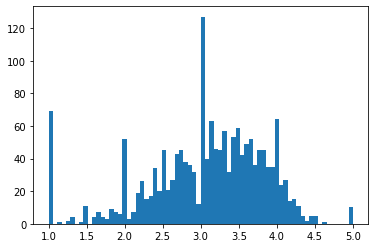

In [339]:
plt.hist(ratings['rating'],bins=70)
plt.show()

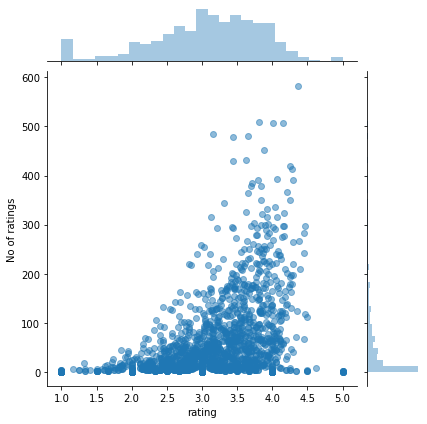

In [340]:
sns.jointplot(x="rating",y="No of ratings",data=ratings,alpha=0.5)

# RECOMMENDATION SYSTEM

In [341]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [342]:
df=df.sort_values(by='user_id')

In [343]:
df

,user_id,item_id,rating,timestamp,title
43606,1,12,5,878542960,"Usual Suspects, The (1995)"
79998,1,254,1,878541392,Batman & Robin (1997)
35906,1,189,3,888732928,"Grand Day Out, A (1992)"
69127,1,87,5,878543541,Searching for Bobby Fischer (1993)
51383,1,187,4,874965678,"Godfather: Part II, The (1974)"
...,...,...,...,...,...
53109,943,168,2,888638897,Monty Python and the Holy Grail (1974)
62194,943,28,4,875409978,Apollo 13 (1995)
55359,943,941,1,888639725,With Honors (1994)
44928,943,186,5,888639478,"Blues Brothers, The (1980)"


In [344]:
data=df.values

In [345]:
data

array([[1, 12, 5, 878542960, 'Usual Suspects, The (1995)'],
       [1, 254, 1, 878541392, 'Batman & Robin (1997)'],
       [1, 189, 3, 888732928, 'Grand Day Out, A (1992)'],
       ...,
       [943, 941, 1, 888639725, 'With Honors (1994)'],
       [943, 186, 5, 888639478, 'Blues Brothers, The (1980)'],
       [943, 449, 1, 888693158, 'Star Trek: The Motion Picture (1979)']],
      dtype=object)

In [346]:
df['title'].nunique()

1664

In [347]:
df

,user_id,item_id,rating,timestamp,title
43606,1,12,5,878542960,"Usual Suspects, The (1995)"
79998,1,254,1,878541392,Batman & Robin (1997)
35906,1,189,3,888732928,"Grand Day Out, A (1992)"
69127,1,87,5,878543541,Searching for Bobby Fischer (1993)
51383,1,187,4,874965678,"Godfather: Part II, The (1974)"
...,...,...,...,...,...
53109,943,168,2,888638897,Monty Python and the Holy Grail (1974)
62194,943,28,4,875409978,Apollo 13 (1995)
55359,943,941,1,888639725,With Honors (1994)
44928,943,186,5,888639478,"Blues Brothers, The (1980)"


In [367]:
d=df.groupby('title').count()


In [390]:
movie_columns=list(d.index)

In [391]:
u=df.groupby("user_id").count()['title']

In [393]:
u.columns=movie_columns

In [394]:
u

user_id
1      272
2       62
3       54
4       24
5      175
      ... 
939     49
940    107
941     22
942     79
943    168
Name: title, Length: 943, dtype: int64